<a href="https://colab.research.google.com/github/rajaram1988/Rajaram-Data-Scientist/blob/rajaram1988-Capstone/Capstone_AIML_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library 

Setting the work directory and importing necessary libraries

In [ ]:
from google.colab import drive  
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
import os
import glob

os.chdir('/content/drive/My Drive/Capstone/')
path='.'

In [ ]:
!pip install --upgrade pip
import numpy as np
!pip install scikit-multilearn
!pip install arff
!pip install googletrans
!pip install pyLDAvis
!pip install langid
!pip install pyspellchecker
import langid
import pyLDAvis.gensim
!pip install wordninja 
import nltk
import utils
import pandas as pd
from nltk.corpus import wordnet
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('words')
from spacy.lang.en.stop_words import STOP_WORDS
from nltk.tokenize import word_tokenize
!pip install pyspellchecker
import warnings
warnings.filterwarnings('ignore')



     |████████████████████████████████| 1.5MB 5.4MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 89 kB 3.6 MB/s 
  Created wheel for arff: filename=arff-0.9-py3-none-any.whl size=4969 sha256=b80614093ee034d351db1ce79795f556d45944983b4af909b8e7f1fe0f01a59a
  Stored in directory: /root/.cache/pip/wheels/2a/7c/ad/d1252fd9f58084dc9d18c965b72b101c926d27cc077f0cef67
Successfully built arff
     |████████████████████████████████| 55 kB 2.8 MB/s 
     |████████████████████████████████| 930 kB 14.3 MB/s 
     |████████████████████████████████| 42 kB 1.7 MB/s 
     |████████████████████████████████| 53 kB 2.6 MB/s 
     |████████████████████████████████| 65 kB 4.2 MB/s 
     |████████████████████████████████| 98 kB 9.8 MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15734 sha256=abd0f6556d923d424bf4cc7391cb1e21bf4a211fe5278a5e89798d9b9cf17a5a
  St

/usr/local/lib/python3.6/dist-packages/_pytest/mark/structures.py:426: DeprecationWarning: The usage of `cmp` is deprecated and will be removed on or after 2021-06-01.  Please use `eq` and `order` instead.
  @attr.s(cmp=False, hash=False)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
path = '/content/drive/My Drive/Capstone/'

In [ ]:
import pandas as pd

tic_df = pd.read_excel('input_data.xlsx')

In [ ]:
tic_df.shape

(8500, 4)

In [ ]:
tic_df.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [ ]:
tic_df.rename(columns={"Short description": "Short_description", "Assignment group": "Assignment_group"},inplace=True)

In [ ]:
tic_df.isna().sum()

Short_description    8
Description          1
Caller               0
Assignment_group     0
dtype: int64

In [ ]:
tic_df[tic_df['Short_description'].isna()] 

,Short_description,Description,Caller,Assignment_group
2604,NaN,\n\nreceived from: ohdrnswl.rezuibdt@gmail.com...,ohdrnswl rezuibdt,GRP_34
3383,NaN,\n-connected to the user system using teamview...,qftpazns fxpnytmk,GRP_0
3906,NaN,-user unable tologin to vpn.\n-connected to t...,awpcmsey ctdiuqwe,GRP_0
3910,NaN,-user unable tologin to vpn.\n-connected to t...,rhwsmefo tvphyura,GRP_0
3915,NaN,-user unable tologin to vpn.\n-connected to t...,hxripljo efzounig,GRP_0
3921,NaN,-user unable tologin to vpn.\n-connected to t...,cziadygo veiosxby,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,wvqgbdhm fwchqjor,GRP_0
4341,NaN,\n\nreceived from: eqmuniov.ehxkcbgj@gmail.com...,eqmuniov ehxkcbgj,GRP_0


In [ ]:
null_description = tic_df.loc[tic_df['Short_description'].isna(),'Description']

tic_df.loc[tic_df['Short_description'].isna(),'Short_description'] = null_description

In [ ]:
null_sdescription = tic_df.loc[tic_df['Description'].isna(),'Short_description']

tic_df.loc[tic_df['Description'].isna(),'Description'] = null_sdescription

In [ ]:
tic_df.isna().sum()

Short_description    0
Description          0
Caller               0
Assignment_group     0
dtype: int64

In [ ]:
# summerize the labelled language
tic_df['Description'][0:5].apply(langid.classify)

0     (en, -431.8451840877533)
1    (en, -280.24146819114685)
2    (en, -105.38433408737183)
3     (en, -21.68566083908081)
4      (da, -10.9104642868042)
Name: Description, dtype: object

In [ ]:
# get the language id for each text
ids_langid = tic_df['Description'].apply(langid.classify)
# get just the language label
langs = ids_langid.apply(lambda tuple: tuple[0])

# how many unique language labels were applied?
print("Number of tagged languages (estimated):")
print(len(langs.unique()))

# percent of the total dataset in English
print("Percent of data in English (estimated):")
print((sum(langs=="en")/len(langs))*100)

Number of tagged languages (estimated):
43
Percent of data in English (estimated):
84.65882352941176


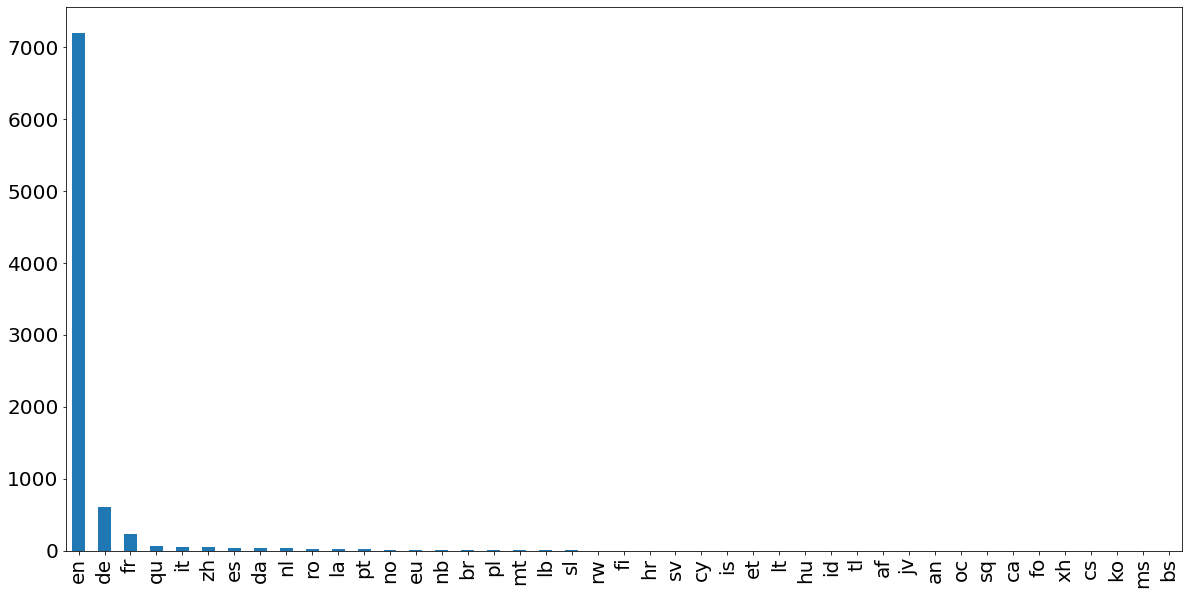

In [ ]:
# convert our list of languages to a dataframe
langs_df = pd.DataFrame(langs)

# count the number of times we see each language
langs_count = langs_df.Description.value_counts()

# horrible-looking barplot (I would suggest using R for visualization)
langs_count.plot.bar(figsize=(20,10), fontsize=20)

In [ ]:
print(langs_count)

en    7196
de     602
fr     240
qu      71
it      49
zh      47
es      37
da      37
nl      35
ro      25
la      25
pt      20
no      12
eu      11
nb      11
br      10
pl      10
mt       8
lb       7
sl       6
rw       4
fi       4
hr       3
sv       3
cy       3
is       2
et       2
lt       2
hu       2
id       2
tl       2
af       1
jv       1
an       1
oc       1
sq       1
ca       1
fo       1
xh       1
cs       1
ko       1
ms       1
bs       1
Name: Description, dtype: int64


In [ ]:
tic_df['Assignment_group'] = tic_df.Assignment_group.astype("category").cat.codes

In [ ]:
A_Grp = tic_df['Assignment_group'].unique()
Sorted_Grp = sorted(A_Grp)
print(Sorted_Grp)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73]


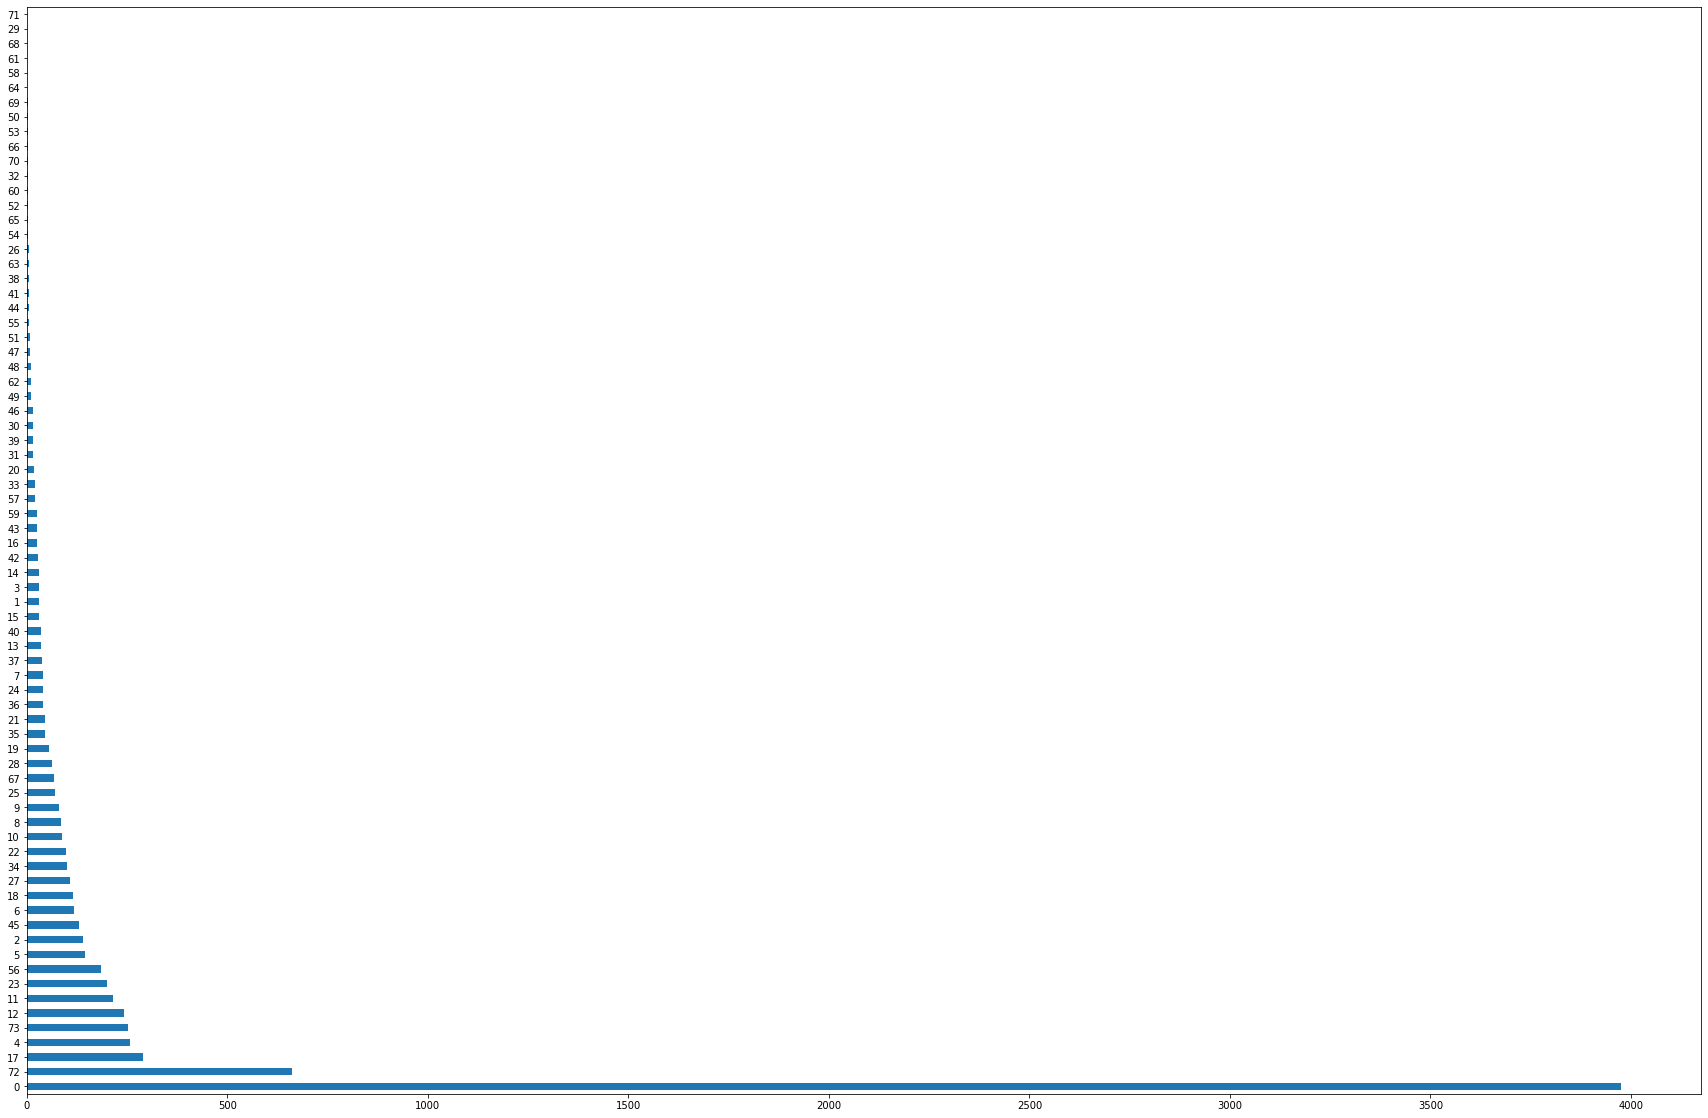

In [ ]:
import matplotlib.pyplot as plt

tic_df['Assignment_group'].value_counts().plot(kind='barh', figsize=(30,20))

In [ ]:
import re
my_string = '''
received from: rajaram1988@gmail.com
from:
to:
cc:


hello,

i'm not being able to connect to company network through the vpn. pls check.

cc: sir-i am not being able to upload as a result of no company network.



hi karghyuen,

i have compared the pos data between crm and bi for september '16 and the data are in sync.
i will run the programdnty on 10/10 to update the table zcp002.

crm                                           bi 
count of mandt sum of toengineering_tool  sum of counter sum of total distributor cost
                     225 82,043.48                             225       82,043.48
''' 

utils.rline(my_string)

"hello,i'm not being able to connect to company network through the vpn. pls check.hi karghyuen,i have compared the pos data between crm and bi for september '16 and the data are in sync.i will run the programdnty on 10/10 to update the table zcp002.crm                                           bi count of mandt sum of toengineering_tool  sum of counter sum of total distributor cost                     225 82,043.48                             225       82,043.48"

In [ ]:
import re
my_string = '''


name:wvngzrca sfmrzdth

browser:microsoft internet explorer
email:wvngzrca.sfmrzdth@gmail.com
customer number:
phone:

hello,

i'm not being able to connect to company network through the vpn. pls check.

cc: sir-i am not being able to upload as a result of no company network.
'''

utils.rline1(my_string)

"hello,i'm not being able to connect to company network through the vpn. pls check.cc: sir-i am not being able to upload as a result of no company network."

In [ ]:
#%%time
#tic_df['clean_desc'] = tic_df['Description'].apply(utils.rline)
#tic_df['clean_desc'] = tic_df['clean_desc'].apply(utils.rline1)

In [ ]:
tic_df['clean_desc'] = tic_df['Short_description'] + tic_df['Description']

FrequencyVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f5ffeaca9e8>,
                    color=None,
                    features=['00', '000', '0000', '000000', '000000220624227',
                              '000000221254416', '000000223172498',
                              '000000223670658', '000001', '00000etc', '00001',
                              '000010', '00001unable', '00002', '000020',
                              '000030', '000040', '000050', '000060', '000070',
                              '000080', '000090', '0000a0', '0000b0', '0000c0',
                              '0000d0', '0000e0', '0000f0', '0001', '00010', ...],
                    n=None, orient='v')

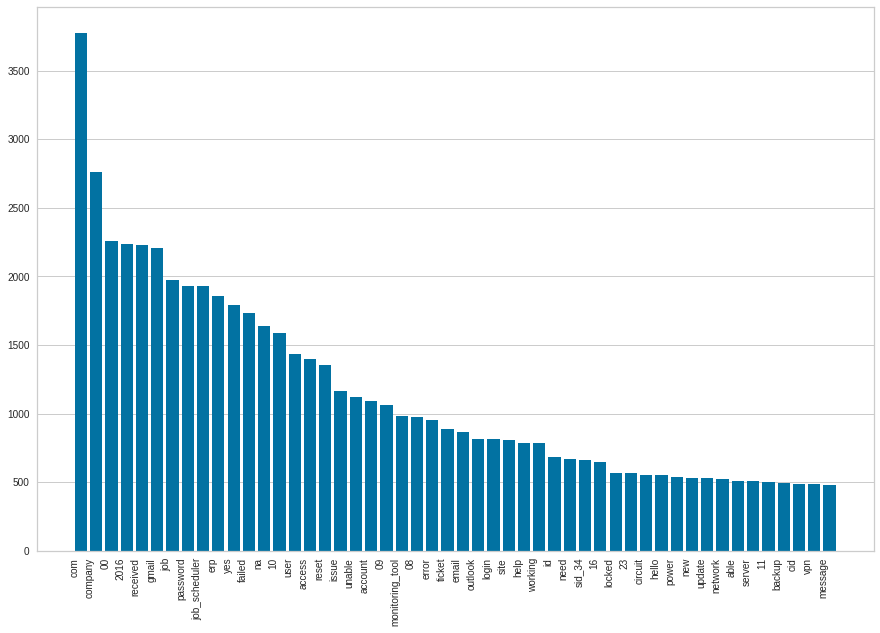

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

from yellowbrick.text import FreqDistVisualizer

from gensim import corpora

text_data = tic_df['clean_desc'].tolist()

vectorizer = CountVectorizer(stop_words='english')
docs       = vectorizer.fit_transform(text_data)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, orient='v', size=(1080, 720))
visualizer.fit(docs)

In [ ]:
from nltk.tokenize import word_tokenize 
text = "windowshighereducationnonameuseridmanager"
utils.spli(text)

'  higher   education   no   name   use   rid   manager '

In [ ]:
utils.spl("windowshighereducationnonameuseridmanager")

' windows   higher   education    name   use   rid   manager '

In [ ]:
utils.preprocess(" user id rajaram/ chinnayan hi Salut, comment allez-vous, regardez le problème du serveur  Salut, comment allez-vous, regardez le problème du serveur Windows afternoon n't rajaram.chinnayan@gmail.com 20/12/2020 04:30:00 /exurcwkmsubject nonameuseridmanager")

'user rajaram chinnayan how be -id- look the server problem window not exurcwkm useridmanager'

In [ ]:
#%%time
#tic_df['clean_desc']  = tic_df['clean_desc'].apply(utils.preprocess)

In [ ]:
#tic_df.to_csv('preprocessednew.csv')    

In [ ]:
tic_df.empty
tic_df=pd.read_csv('preprocessed3.csv')

In [ ]:
tic_df.isna().sum()

Unnamed: 0           0
Unnamed: 0.1         0
Short_description    0
Description          0
Caller               0
Assignment_group     0
clean_desc           3
fname                0
lname                0
dtype: int64

In [ ]:
tic_df.loc[tic_df['clean_desc'].isna()]

,Unnamed: 0,Unnamed: 0.1,Short_description,Description,Caller,Assignment_group,clean_desc,fname,lname
2045,2045,2045,uacyltoe hxgaycze,uacyltoe hxgaycze,xweclugf qmhbjsyi,4,NaN,xweclugf,qmhbjsyi
2070,2070,2070,uacyltoe hxgaycze,uacyltoe hxgaycze,rxoluzhy pnutohms,30,NaN,rxoluzhy,pnutohms
2192,2192,2192,uacyltoe hxgaycze,uacyltoe hxgaycze,fdmaluyo tvecikxn,0,NaN,fdmaluyo,tvecikxn


In [ ]:
tic_df.dropna(inplace=True)

In [ ]:
#to remove first name and last name from description

fname = [] 
lname = []

tic_df[['fname','lname']] = tic_df.Caller.str.split(expand=True) 

In [ ]:
%%time 
def name(text,name):
  repl = text.replace(name,'')
  return repl

tic_df['clean_desc'] = name(tic_df['clean_desc'],tic_df['fname']) 
tic_df['clean_desc'] = name(tic_df['clean_desc'],tic_df['lname']) 

CPU times: user 14.5 s, sys: 0 ns, total: 14.5 s
Wall time: 14.5 s


In [ ]:
import nltk
from nltk.corpus import words
nltk.download('words')

def aaa(text,aaa):
  sent = []
  excl = []
  a = text.split()
  for b,c in enumerate(a):
    if c.find(aaa) == -1 or c.replace('aaa','') in words.words() != bool("True"):
      sent.append(a[b])
    else:
      pass  
  senti=' '.join([text for text in sent])    
  return senti 

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:
text = 'hi aaatext aas '
aaa(text,'aaa')

'hi aaatext aas'

In [ ]:
clean_desc=[]
for i,j in enumerate(tic_df['clean_desc']):
  clean_desc.append(aaa(j,'aaa'))

In [ ]:
tic_df['clean_desc'] = clean_desc

In [ ]:
text = 'hi aahing aaliis aarrgh baaing baalim baases bazaar aac aaca aacecc aacoaz aacount aacsi aaeei aai aao aaoa aaocsa aaocse aaoeee aaoo aaoskypea aarr aas aasa aavpn aayai aaymann aaz aazea aazi abandon abap abb abba abc abca'
aaa(text,'aa')

'hi bazaar abandon abap abb abba abc abca'

In [ ]:
import nltk
from nltk.corpus import words
nltk.download('words')

def meanaa(text,aa):
  sent = []
  a = text.split()
  for b,c in enumerate(a):
    if c.find(aa) == -1 or c in words.words() != bool("True"):
      sent.append(a[b])
    else:
      pass  
  return ' '.join([text for text in sent])

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:
clean_desc1=[]
for i,j in enumerate(tic_df['clean_desc']):
  clean_desc1.append(meanaa(j,'aa'))

In [ ]:
tic_df['clean_desc'] = clean_desc1

FrequencyVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f5feff47da0>,
                    color=None,
                    features=['aa', 'ab', 'aba', 'abandon', 'abb', 'abc', 'abd',
                              'abdhtyu', 'abdomen', 'abgebildet', 'abgrtyreu',
                              'ability', 'able', 'abode', 'abort', 'aborting',
                              'abovementioned', 'abreu', 'abrupt', 'absence',
                              'absent', 'absolutely', 'abu', 'ac', 'aca', 'acc',
                              'accede', 'accept', 'acceptance', 'accepting', ...],
                    n=None, orient='v')

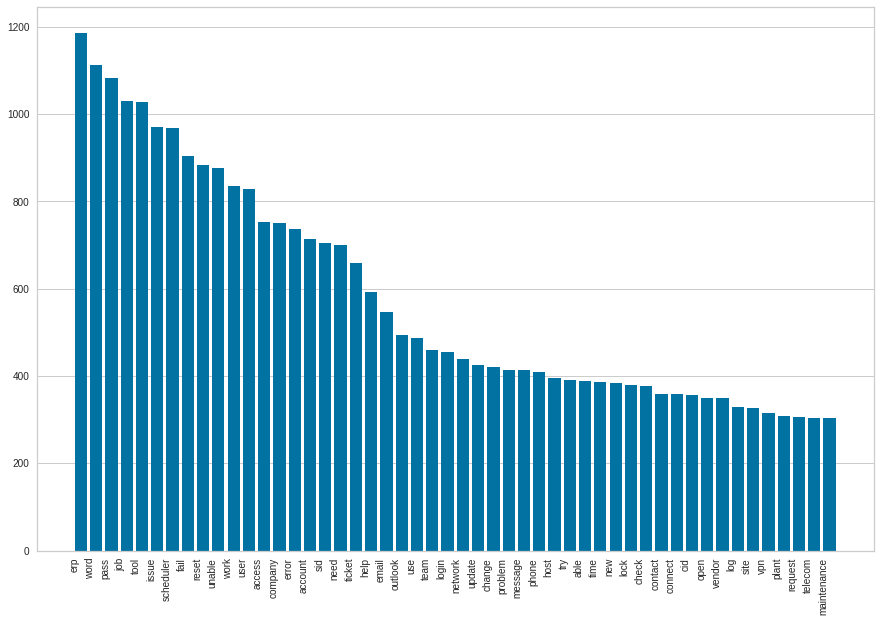

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

from yellowbrick.text import FreqDistVisualizer

from gensim import corpora

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

text_data = tic_df['clean_desc'].tolist()

vectorizer = CountVectorizer(stop_words='english')
docs       = vectorizer.fit_transform(text_data)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, orient='v', size=(1080, 720))
visualizer.fit(docs)

In [ ]:
docs = tic_df['clean_desc']

In [ ]:
docs=docs.tolist()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

#create a vocabulary of words, 
#ignore words that appear in 85% of documents, 
#eliminate stop words
cv=CountVectorizer(ngram_range = (1, 2),stop_words=STOP_WORDS,max_features=10000)
word_count_vector=cv.fit_transform(docs)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [ ]:
# tf-idf scores
tf_idf_vector=tfidf_transformer.transform(word_count_vector)

In [ ]:
feature_names = cv.get_feature_names()

#get tfidf vector for first document
first_document_vector=tf_idf_vector[20]

#print the scores
df = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False).tail(20)

,tfidf
help contact,0.0
help connect,0.0
help company,0.0
help clear,0.0
height,0.0
help,0.0
help access,0.0
help account,0.0
help add,0.0
help advise,0.0


In [ ]:
%%time
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

glove_file = datapath('/content/drive/My Drive/Capstone/glove.6B.300d.txt')
tmp_file = get_tmpfile("test_word2vec.txt")
_ = glove2word2vec(glove_file, tmp_file)
embeddings_index = KeyedVectors.load_word2vec_format(tmp_file)

CPU times: user 1min 40s, sys: 3.3 s, total: 1min 44s
Wall time: 2min 1s


In [ ]:
from tqdm import tqdm

tqdm.pandas()

def build_vocab(sentences, verbose =  True):
    """
    :param sentences: list of list of words
    :return: dictionary of words and their count
    """
    vocab = {}
    for sentence in tqdm(sentences, disable = (not verbose)):
        for word in sentence:
            try:
                vocab[word] += 1
            except KeyError:
                vocab[word] = 1
    return vocab

In [ ]:
sentences = tic_df['clean_desc'].apply(lambda x: x.split()).values
vocab = build_vocab(sentences)
print({k: vocab[k] for k in list(vocab)[:5]})

100%|██████████| 8496/8496 [00:00<00:00, 286813.10it/s]

{'login': 456, 'issue': 970, 'verified': 3, 'user': 827, 'detail': 181}


In [ ]:
sort_orders = sorted(vocab.items(), key=lambda x: x[1], reverse=True)

In [ ]:
import operator 

def check_coverage(vocab,embeddings_index):
    a = {}
    oov = {}
    k = 0
    i = 0
    for word in tqdm(vocab):
        try:
            a[word] = embeddings_index[word]
            k += vocab[word]
        except:

            oov[word] = vocab[word]
            i += vocab[word]
            pass

    print('Found embeddings for {:.2%} of vocab'.format(len(a) / len(vocab)))
    print('Found embeddings for  {:.2%} of all text'.format(k / (k + i)))
    sorted_x = sorted(oov.items(), key=operator.itemgetter(1))[::-1]

    return sorted_x

In [ ]:
oov = check_coverage(vocab,embeddings_index)

100%|██████████| 10125/10125 [00:00<00:00, 317012.62it/s]

Found embeddings for 54.70% of vocab
Found embeddings for  95.29% of all text


In [ ]:
oov

[('deinstall', 32),
 ('bkwinhost', 19),
 ('infopath', 18),
 ('callblank', 17),
 ('wnkpzcmv', 17),
 ('gigabitethernet', 17),
 ('ionsherlock', 16),
 ('iondevice', 16),
 ('ionsource', 16),
 ('naruedlk', 16),
 ('azbtkqwx', 16),
 ('phvkowml', 16),
 ('lockedaccount', 15),
 ('rqfhiong', 15),
 ('southamerirtca', 15),
 ('jionmpsf', 15),
 ('markhtyete', 15),
 ('ramthanjesh', 14),
 ('financeapp', 14),
 ('jwoqbuml', 14),
 ('vzqomdgt', 14),
 ('fastethernet', 14),
 ('zkwfqagb', 13),
 ('csenjruz', 13),
 ('qlhmawgi', 13),
 ('argtxmvcumar', 13),
 ('keybankrd', 13),
 ('floorapp', 12),
 ('sgwipoxn', 12),
 ('dwfiykeo', 12),
 ('tcjnuswg', 11),
 ('lhqksbdx', 11),
 ('sartlgeo', 11),
 ('niptbwdq', 11),
 ('mikhghytr', 11),
 ('lockoutwindow', 11),
 ('sunaccount', 11),
 ('aclinside', 10),
 ('matheywtyuews', 10),
 ('stefyty', 10),
 ('hardpoint', 10),
 ('supplychain', 10),
 ('cfibdamq', 10),
 ('ughzilfm', 10),
 ('wzrgyunp', 10),
 ('wrcktgbd', 10),
 ('davidthd', 10),
 ('prtgghj', 10),
 ('gosbank', 10),
 ('blockedcv

In [ ]:
tic_df['clean_desc']=tic_df['clean_desc'].apply(lambda x: x.replace('uacyltoe',''))
tic_df['clean_desc']=tic_df['clean_desc'].apply(lambda x: x.replace('hxgaycze',''))
tic_df['clean_desc']=tic_df['clean_desc'].apply(lambda x: x.replace('mailto',''))
tic_df['clean_desc']=tic_df['clean_desc'].apply(lambda x: x.replace('exurcwkm',''))
tic_df['clean_desc']=tic_df['clean_desc'].apply(lambda x: x.replace('nwfodmhc',''))
tic_df['clean_desc']=tic_df['clean_desc'].apply(lambda x: x.replace('smhdyhti',''))

In [ ]:
sentences = tic_df['clean_desc'].apply(lambda x: x.split()).values
vocab = build_vocab(sentences)
print({k: vocab[k] for k in list(vocab)[:5]})

100%|██████████| 8496/8496 [00:00<00:00, 251381.29it/s]

{'login': 456, 'issue': 970, 'verified': 3, 'user': 827, 'detail': 181}


In [ ]:
oov = check_coverage(vocab,embeddings_index)

100%|██████████| 10122/10122 [00:00<00:00, 423079.37it/s]

Found embeddings for 54.72% of vocab
Found embeddings for  95.30% of all text


In [ ]:
#from utils import spellcheck as spck

#tic_df['clean_desc']=tic_df['clean_desc'].apply(spck)

In [ ]:
#tic_df.to_csv('preprocessed3.csv')   

In [ ]:
#tic_df.empty
#tic_df=pd.read_csv('preprocessedoov.csv')

In [ ]:
tic_df.tail(20)

,Unnamed: 0,Unnamed: 0.1,Short_description,Description,Caller,Assignment_group,clean_desc,fname,lname
8479,8480,8480,customer group enhanced field,\n\nreceived from: nlearzwi.ukdzstwi@gmail.com...,nlearzwi ukdzstwi,73,customer group enhance field business decision...,nlearzwi,ukdzstwi
8480,8481,8481,ess portal,\n\nreceived from: eagvusbr.nguqityl@gmail.com...,eagvusbr nguqityl,73,ess portal team be go into the file and check ...,eagvusbr,nguqityl
8481,8482,8482,robot HostName_776 is inactive,robot HostName_776 is inactive,rkupnshb gsmzfojw,72,robot host be inactiverobot inactive,rkupnshb,gsmzfojw
8482,8483,8483,fw: case id [ref:_case-111121032:ref] :: others,"from: pacvbetl yptglhoe \nsent: thursday, augu...",pacvbetl yptglhoe,0,fw case ref otherssubject amar othersplease se...,pacvbetl,yptglhoe
8483,8484,8484,please remove user hugcadrn ixhlwdgt (ralfteim...,please remove user hugcadrn ixhlwdgt (ralfteim...,hugcadrn ixhlwdgt,12,please remove user hugcadrn ixhlwdgt ralfteimp...,hugcadrn,ixhlwdgt
8484,8485,8485,ticket update on inc1538505 to user hbmwlprq i...,ticket update on inc1538505 to user hbmwlprq i...,fumkcsji sarmtlhy,0,ticket update on inc to user hbmwlprq ilfvyodx...,fumkcsji,sarmtlhy
8485,8486,8486,ticket update on ticket_no0427635,ticket update on ticket_no0427635,fumkcsji sarmtlhy,0,ticket update on ticket no,fumkcsji,sarmtlhy
8486,8487,8487,telephony_software is missing from pc,pc received multiple windows security updates ...,pvbomqht smfkuhwi,23,telephony software be miss pcc receive multipl...,pvbomqht,smfkuhwi
8487,8488,8488,erp account unlock,name:mfeyouli ndobtzpw\nlanguage:\nbrowser:mic...,rbozivdq gmlhrtvp,0,erp account unlock summary for gadbpfrz unvdya...,rbozivdq,gmlhrtvp
8488,8489,8489,account locked,account locked,sdvlxbfe ptnahjkw,0,account lockedaccount lock,sdvlxbfe,ptnahjkw


In [ ]:
from gensim.models import Word2Vec
from gensim.models import FastText 
import pandas as pd
from tqdm import tqdm
tqdm.pandas()

docs = tic_df['clean_desc']
token_doc = [[text for text in doc.split()] for doc in docs]

In [ ]:
embedding_size = 300
window_size = 5
min_word = 1

In [ ]:
%%time
ft_model = FastText(token_doc,
                      size=embedding_size,
                      window=window_size,
                      min_count=min_word,
                      sg=1,negative=15,
                      iter=10)

CPU times: user 54 s, sys: 524 ms, total: 54.5 s
Wall time: 30.2 s


In [ ]:
semantically_similar_words = {words: [item[0] for item in ft_model.wv.most_similar([words], topn=5)]
                  for words in ['computer', 'facilitate', 'mails', 'folder', 'rate', 'flash']}

for k,v in semantically_similar_words.items():
    print(k+":"+str(v))

computer:['thecomputer', 'wijuiidlcomputer', 'rebootcomputer', 'workcomputer', 'compute']
facilitate:['paris', 'sundaycommitted', 'illustrate', 'mexico', 'sludgeshippe']
mails:['mailscrm', 'mailsgood', 'z-mail', 'hubemail', 'emailnot']
folder:['folders', 'subfolder', 'holder', 'fold', 'folk']
rate:['kate', 'ate', 'migrate', 'accurate', 'rebate']
flash:['adobe', 'player', 'ash', 'played', 'dash']


In [ ]:
oov = check_coverage(vocab,ft_model)

100%|██████████| 10122/10122 [00:00<00:00, 165869.30it/s]

Found embeddings for 100.00% of vocab
Found embeddings for  100.00% of all text


In [ ]:
ft_model.wv.save_word2vec_format('custom_glove_300d.txt')

In [ ]:
from gensim import corpora

text_data = tic_df['clean_desc'].apply(word_tokenize)

dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(text) for text in text_data]

import pickle 
pickle.dump(corpus, open('corpus.pkl','wb'))
dictionary.save('dictionary.gensim')

In [ ]:
from gensim.models import ldamodel

result = ldamodel.LdaModel(corpus,id2word=dictionary,num_topics = 74)
print(result.show_topics())

for idx,topic in result.print_topics(-1):
  print('Topic: {} \nWords: {}'.format(idx,topic))

[(64, '0.083*"on" + 0.074*"down" + 0.064*"be" + 0.063*"et" + 0.060*"since" + 0.041*"pm" + 0.037*"usa" + 0.026*"at" + 0.024*"india" + 0.021*"qa"'), (51, '0.053*"between" + 0.051*"hana" + 0.034*"ok" + 0.032*"map" + 0.026*"at" + 0.022*"noiseblank" + 0.020*"repair" + 0.019*"sea" + 0.019*"in" + 0.019*"trouble"'), (8, '0.037*"each" + 0.034*"be" + 0.030*"above" + 0.026*"ve" + 0.025*"search" + 0.024*"the" + 0.023*"whenever" + 0.023*"in" + 0.022*"not" + 0.020*"people"'), (34, '0.023*"another" + 0.023*"assign" + 0.020*"to" + 0.019*"be" + 0.018*"the" + 0.015*"please" + 0.013*"determine" + 0.013*"for" + 0.013*"do" + 0.012*"in"'), (28, '0.048*"germany" + 0.043*"eu" + 0.035*"external" + 0.034*"work" + 0.031*"not" + 0.028*"be" + 0.025*"to" + 0.022*"access" + 0.021*"no" + 0.021*"possible"'), (69, '0.039*"to" + 0.038*"th" + 0.030*"pls" + 0.025*"for" + 0.024*"the" + 0.022*"attachment" + 0.021*"see" + 0.021*"ca" + 0.020*"re" + 0.018*"help"'), (73, '0.062*"link" + 0.061*"mii" + 0.048*"blank" + 0.041*"so" 

In [ ]:
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)


# Compute Perplexity
print('\nPerplexity: ', result.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=result, texts=text_data, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.9514839163341335

Coherence Score:  0.4960934668645882


In [ ]:
lda_display = pyLDAvis.gensim.prepare(result,corpus,dictionary,sort_topics=True)
pyLDAvis.display(lda_display)

In [ ]:
from gensim.models.phrases import Phrases, Phraser

tokenize = word_tokenize
docs = tic_df['clean_desc']
docs = [tokenize(doc) for doc in docs]
phrases = Phrases(docs)
bigrams = Phraser(phrases)
trigrams = Phrases(bigrams[docs])

In [ ]:
for idx in range(len(docs)):
    for token in bigrams[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)
    for token in trigrams[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)

In [ ]:
from gensim.corpora import Dictionary

corpus1 = [[w for w in bigrams[doc]] for doc in docs]
dictionary = corpora.Dictionary(corpus1)
# Create a dictionary representation of the documents.
#dictionary = Dictionary(docs)
print('Number of unique words in initital documents:', len(dictionary))

# Filter out words that occur less than 10 documents, or more than 20% of the documents.
dictionary.filter_extremes(no_below=10, no_above=0.2)
print('Number of unique words after removing rare and common words:', len(dictionary))


Number of unique words in initital documents: 13522
Number of unique words after removing rare and common words: 1561


In [ ]:
corpus1 = [dictionary.doc2bow(doc) for doc in docs]

In [ ]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 1561
Number of documents: 8497


In [ ]:
import pickle 
pickle.dump(corpus, open('corpus1.pkl','wb'))
dictionary.save('dictionary1.gensim')

In [ ]:
from gensim.models import LdaModel
# Set training parameters.
num_topics = 74

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

%time 
model = LdaModel(corpus=corpus1, id2word=id2word, num_topics = 74)
print(model.show_topics())

for idx,topic in model.print_topics(-1):
  print('Topic: {} \nWords: {}'.format(idx,topic))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.25 µs
[(68, '0.029*"network_outage" + 0.027*"gsc_additional" + 0.025*"provider_maint" + 0.025*"ticket_have" + 0.020*"phone_email" + 0.019*"maintenance_company" + 0.019*"contact_notify" + 0.019*"verify_work" + 0.019*"equipment_reset" + 0.019*"remote_dial"'), (45, '0.072*"printer" + 0.043*"print" + 0.043*"thank_-" + 0.041*"defective" + 0.032*"account_lockedaccount" + 0.027*"ask" + 0.026*"for" + 0.024*"thank" + 0.023*"machine" + 0.023*"install"'), (71, '0.226*"unable_connect" + 0.090*"connect" + 0.081*"unable" + 0.041*"vpn" + 0.032*"every_time" + 0.026*"enable" + 0.021*"every" + 0.016*"time" + 0.015*"out" + 0.012*"hub"'), (9, '0.149*"please_check" + 0.061*"check" + 0.059*"please" + 0.037*"error_message" + 0.023*"cid" + 0.023*"and" + 0.020*"for" + 0.019*"message" + 0.019*"error" + 0.019*"-"'), (4, '0.241*"not_work" + 0.083*"work" + 0.074*"not" + 0.068*"lock_out" + 0.065*"windows_account" + 0.052*"lock" + 0.037*"account" + 0.031*"win

In [ ]:
lda_display = pyLDAvis.gensim.prepare(model,corpus1,dictionary,sort_topics=True)
pyLDAvis.display(lda_display)

***REPLICATING THE DATA TO REDUCE CLASS IMBALANCE***

In [ ]:
crit = tic_df.groupby(['Assignment_group']).size() < 10

In [ ]:
crit[crit==True]

Assignment_group
32    True
52    True
54    True
60    True
65    True
dtype: bool

In [ ]:
replica = tic_df[tic_df['Assignment_group'].isin([32,52,54,60,65])]

In [ ]:
crit = tic_df.groupby(['Assignment_group']).size() < 50

In [ ]:
crit[crit==True]

Assignment_group
26    True
30    True
31    True
32    True
38    True
39    True
41    True
44    True
46    True
47    True
48    True
49    True
51    True
52    True
54    True
55    True
60    True
62    True
63    True
65    True
dtype: bool

In [ ]:
replica1 = tic_df[tic_df['Assignment_group'].isin([26,31,32,38,39,41,44,46,47,48,49,51,52,54,55,60,62,63,65])]

In [ ]:
df = tic_df.append(replica)

In [ ]:
tic_df = df.append(replica1)

In [ ]:
tic_df.shape

(15533, 9)

In [ ]:
tic_df.to_csv('ReplicatedFinal.csv')   

***NON NEURAL NETWORK MODELS***

In [ ]:
sentences = tic_df['clean_desc'].tolist()

In [ ]:
vectorizer = CountVectorizer(stop_words=STOP_WORDS,max_features=10000)
vectorizer.fit(sentences)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=10000, min_df=1,
                ngram_range=(1, 1), preprocessor=None,
                stop_words={"'d", "'ll", "'m", "'re", "'s", "'ve", 'a', 'about',
                            'above', 'across', 'after', 'afterwards', 'again',
                            'against', 'all', 'almost', 'alone', 'along',
                            'already', 'also', 'although', 'always', 'am',
                            'among', 'amongst', 'amount', 'an', 'and',
                            'another', 'any', ...},
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [ ]:
X1 = vectorizer.transform(sentences).toarray()

In [ ]:
y1 = tic_df['Assignment_group'].values

In [ ]:
'''Classifiers'''
import model
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier

In [ ]:
model_dict = {'Logistic Regression' : LogisticRegression(max_iter=1000),
              'Stochastic Gradient Descent' : SGDClassifier(random_state=3, loss='log'),
              'Random Forest': RandomForestClassifier(random_state=3),
              'Decsision Tree': DecisionTreeClassifier(random_state=3),
              'Support Vector Machines': LinearSVC(max_iter=10000),
              'AdaBoost': AdaBoostClassifier(random_state=3),
              'Gaussian Naive Bayes': GaussianNB(),
              'K Nearest Neighbor': KNeighborsClassifier()
              }

model.score_matrix(model_dict,X1,y1)

Total Time for Logistic Regression is  5.195008373260498
Total Time for Stochastic Gradient Descent is  3.3789483507474265
Total Time for Random Forest is  1.0566284974416098
Total Time for Decsision Tree is  0.7170566479365031
Total Time for Support Vector Machines is  0.1295567274093628
Total Time for AdaBoost is  2.2660355965296426
Total Time for Gaussian Naive Bayes is  0.26663041512171426
Total Time for K Nearest Neighbor is  9.294655179977417


,model_name,accuracy_score,precision_score,recall_score,f1_score
2,Random Forest,84.2613,0.92958,0.833288,0.851988
4,Support Vector Machines,83.167,0.851829,0.845343,0.839379
0,Logistic Regression,82.6843,0.877962,0.80729,0.820213
1,Stochastic Gradient Descent,81.4612,0.872258,0.787932,0.807506
3,Decsision Tree,80.0129,0.807283,0.825957,0.805668
6,Gaussian Naive Bayes,68.3939,0.704128,0.827422,0.735837
7,K Nearest Neighbor,65.8835,0.766036,0.573747,0.595612
5,AdaBoost,36.2407,0.990325,0.0945946,0.08706


***Deep Learning Neural network Models***

In [ ]:

from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
import tensorflow as tf
from keras.models import *
from keras.layers import *
from keras.callbacks import *
from keras.preprocessing import sequence, text
from keras.preprocessing.text import Tokenizer
from tensorflow import keras
from keras.preprocessing.sequence import pad_sequences
from keras.optimizers import RMSprop,Adam
from numpy.random import seed
seed(1)

***TRAIN TEST SPLIT***

In [ ]:
#We will check the maximum number of words that can be present in a description , this will help us in padding later

max_len = tic_df['clean_desc'].apply(lambda x:len(str(x).split())).max()

print('The maximum length of words in the headline is',max_len)

The maximum length of words in the headline is 255


In [ ]:
X = tic_df['clean_desc']
y = tf.keras.utils.to_categorical(tic_df['Assignment_group'])

In [ ]:
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y,test_size=0.2, shuffle=True)

In [ ]:
xtrain.shape,xvalid.shape

((12426,), (3107,))

In [ ]:
ytrain.shape,yvalid.shape

((12426, 74), (3107, 74))

***CREATE PADDED SEQUENCE***

In [ ]:
embed_size = 300

# using keras tokenizer here
token = text.Tokenizer(num_words=None)


token.fit_on_texts(list(xtrain) + list(xvalid))
xtrain_seq = token.texts_to_sequences(xtrain)
xvalid_seq = token.texts_to_sequences(xvalid)

#zero pad the sequences
xtrain_pad = sequence.pad_sequences(xtrain_seq, maxlen=max_len)
xvalid_pad = sequence.pad_sequences(xvalid_seq, maxlen=max_len)

word_index = token.word_index

num_words = len(word_index) + 1

In [ ]:
METRICS = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.CategoricalAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
]


In [ ]:
RNN = model.RNN(METRICS,num_words,embed_size,max_len)
RNN.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 255, 300)          3030900   
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 100)               40100     
_________________________________________________________________
dense_17 (Dense)             (None, 74)                7474      
Total params: 3,078,474
Trainable params: 3,078,474
Non-trainable params: 0
_________________________________________________________________


In [ ]:
RNN.fit(xtrain_pad,ytrain,batch_size=100,epochs=20,validation_split=0.2)

Epoch 1/20
100/100 [==============================] - 22s 216ms/step - loss: 0.1513 - tp: 520.0000 - fp: 23500.0000 - tn: 702120.0000 - fn: 9420.0000 - accuracy: 0.1707 - precision: 0.0216 - recall: 0.0523 - auc: 0.6325 - val_loss: 0.0619 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 181478.0000 - val_fn: 2486.0000 - val_accuracy: 0.2631 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.7486
Epoch 2/20
100/100 [==============================] - 21s 207ms/step - loss: 0.0610 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 725620.0000 - fn: 9940.0000 - accuracy: 0.2563 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.7701 - val_loss: 0.0601 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 181478.0000 - val_fn: 2486.0000 - val_accuracy: 0.2631 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.7801
Epoch 3/20
100/100 [==============================] - 21s 207ms/step - loss: 0.0592 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 725620.0000 - fn: 9940.0000 - ac

In [ ]:
loss, tp,fp,tn,fn,accuracy,precision,recall,auc  = RNN.evaluate(xvalid_pad,yvalid,verbose=0)
print(loss,accuracy)
scores_model = []
scores_model.append({'Model': 'RNN','AUC_Score': auc*100,'Accuracy': accuracy*100,'Recall': recall*100,'Precision': precision*100,'F1_Score':(2 * (precision * recall) / (precision + recall)
)*100})
print(scores_model)

0.026115335524082184 0.7383328080177307
[{'Model': 'RNN', 'AUC_Score': 93.40442419052124, 'Accuracy': 73.83328080177307, 'Recall': 63.82362246513367, 'Precision': 89.24392461776733, 'F1_Score': 74.42296764612504}]


In [ ]:
predicted = RNN.predict(xvalid_pad)
ypred = np.argmax(predicted, axis=1)

In [ ]:
# confusion matrix in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print('Confusion Matrix')
print(classification_report(np.argmax(yvalid, axis=1), ypred))
print('Classification Report')

Confusion Matrix
              precision    recall  f1-score   support

           0       0.72      0.82      0.77       772
           1       0.78      0.64      0.70        22
           2       0.35      0.23      0.27        31
           3       0.87      0.72      0.79        18
           4       0.36      0.23      0.28        62
           5       0.09      0.03      0.05        33
           6       0.17      0.11      0.13        19
           7       0.60      0.70      0.65        30
           8       0.76      0.98      0.86        49
           9       0.78      1.00      0.88        42
          10       0.67      0.75      0.71        60
          11       0.12      0.08      0.09        38
          12       0.35      0.18      0.24        62
          13       0.79      0.62      0.70        24
          14       0.72      0.87      0.79        15
          15       0.88      0.75      0.81        20
          16       1.00      0.69      0.81        16
          

# Get the Word Embeddings using Embedding file as given below.

In [ ]:
# load the GloVe vectors in a dictionary:

embeddings_index = {}
f = open('glove.6B.300d.txt','r',encoding='utf-8')
for line in tqdm(f):
    values = line.split(' ')
    word = values[0]
    coefs = np.asarray([float(val) for val in values[1:]])
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embeddings_index1 = {}
f = open('custom_glove_300d.txt','r',encoding='utf-8')
for line in tqdm(f):
    values = line.split(' ')
    word = values[0]
    coefs = np.asarray([float(val) for val in values[1:]])
    embeddings_index1[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index1))

400000it [00:33, 11805.08it/s]
1134it [00:00, 11336.28it/s]

Found 400000 word vectors.


10123it [00:00, 11056.89it/s]

Found 10123 word vectors.


# Create a weight matrix for words in training docs

In [ ]:
# create an embedding matrix for the words we have in the dataset
embedding_matrix = np.zeros((len(word_index) + 1, 300))
for word, i in tqdm(word_index.items()):
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
    else:
      embedding_vector1 = embeddings_index1.get(word)
      embedding_matrix[i] = embedding_vector1

100%|██████████| 10102/10102 [00:00<00:00, 332607.42it/s]


In [ ]:
METRICS = [
      tf.keras.metrics.TruePositives(name='tp2'),
      tf.keras.metrics.FalsePositives(name='fp2'),
      tf.keras.metrics.TrueNegatives(name='tn2'),
      tf.keras.metrics.FalseNegatives(name='fn2'), 
      tf.keras.metrics.CategoricalAccuracy(name='accuracy2'),
      tf.keras.metrics.Precision(name='precision2'),
      tf.keras.metrics.Recall(name='recall2'),
      tf.keras.metrics.AUC(name='auc2'),
]


In [ ]:
GLVLSTM = model.GLVSTM(METRICS,num_words,embed_size,embedding_matrix,max_len)
GLVLSTM.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_18 (Embedding)     (None, 255, 300)          3030900   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 255, 300)          0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_21 (Dense)             (None, 74)                7474      
Total params: 3,198,774
Trainable params: 167,874
Non-trainable params: 3,030,900
_________________________________________________________________


In [ ]:
GLVLSTM.fit(xtrain_pad,ytrain,batch_size=100,epochs=20,validation_split=0.2)

Epoch 1/20
100/100 [==============================] - 86s 856ms/step - loss: 3.5811 - tp2: 5725.0000 - fp2: 111178.0000 - tn2: 614442.0000 - fn2: 4215.0000 - accuracy2: 0.2472 - precision2: 0.0490 - recall2: 0.5760 - auc2: 0.7788 - val_loss: 2.8383 - val_tp2: 1022.0000 - val_fp2: 2095.0000 - val_tn2: 179383.0000 - val_fn2: 1464.0000 - val_accuracy2: 0.2631 - val_precision2: 0.3279 - val_recall2: 0.4111 - val_auc2: 0.8586
Epoch 2/20
100/100 [==============================] - 85s 852ms/step - loss: 2.6353 - tp2: 5206.0000 - fp2: 9059.0000 - tn2: 716561.0000 - fn2: 4734.0000 - accuracy2: 0.2563 - precision2: 0.3649 - recall2: 0.5237 - auc2: 0.8854 - val_loss: 2.3757 - val_tp2: 1416.0000 - val_fp2: 2329.0000 - val_tn2: 179149.0000 - val_fn2: 1070.0000 - val_accuracy2: 0.2631 - val_precision2: 0.3781 - val_recall2: 0.5696 - val_auc2: 0.9108
Epoch 3/20
100/100 [==============================] - 85s 851ms/step - loss: 2.2653 - tp2: 4319.0000 - fp2: 5410.0000 - tn2: 720210.0000 - fn2: 5621.000

In [ ]:
loss, tp2,fp2,tn2,fn2,accuracy2,precision2,recall2,auc2  = GLVLSTM.evaluate(xvalid_pad,yvalid,verbose=0)
print('Accuracy: %f' % (accuracy2*100))
print('Area under the curve: %f' % (auc2*100))
print("F1_Score: ",(2 * (precision2 * recall2) / (precision2 + recall2))*100)

scores_model.append({'Model': 'GLOVE CSTM','AUC_Score': auc2*100,'Accuracy': accuracy2*100,'Recall': recall2*100,'Precision': precision2*100,'F1_Score':(2 * (precision2 * recall2) / (precision2 + recall2)
)*100})
print(scores_model)

Accuracy: 71.065336
Area under the curve: 92.944133
F1_Score:  47.00193569562559
[{'Model': 'RNN', 'AUC_Score': 93.40442419052124, 'Accuracy': 73.83328080177307, 'Recall': 63.82362246513367, 'Precision': 89.24392461776733, 'F1_Score': 74.42296764612504}, {'Model': 'GLOVE CSTM', 'AUC_Score': 92.94413328170776, 'Accuracy': 71.06533646583557, 'Recall': 31.28419816493988, 'Precision': 94.46064233779907, 'F1_Score': 47.00193569562559}]


In [ ]:
METRICS = [
      tf.keras.metrics.TruePositives(name='tp3'),
      tf.keras.metrics.FalsePositives(name='fp3'),
      tf.keras.metrics.TrueNegatives(name='tn3'),
      tf.keras.metrics.FalseNegatives(name='fn3'), 
      tf.keras.metrics.CategoricalAccuracy(name='accuracy3'),
      tf.keras.metrics.Precision(name='precision3'),
      tf.keras.metrics.Recall(name='recall3'),
      tf.keras.metrics.AUC(name='auc3'),
]


In [ ]:
def BILSTM(metrics,num_words,embed_size,embedding_matrix,max_len):
  model = Sequential()
  model.add(Embedding(num_words,
                     embed_size,
                     weights=[embedding_matrix],
                     input_length=max_len,
                     trainable=False))
  #lstm layer
  model.add(Bidirectional(LSTM(100, dropout=0.3, recurrent_dropout=0.3)))
  #Dense Layer
  model.add(Dense(74,activation='sigmoid'))
  
  model.compile(loss='categorical_crossentropy', optimizer='Adam',metrics=metrics)
  return model

In [ ]:
BILSTM = BILSTM(METRICS,num_words,embed_size,embedding_matrix,max_len)
BILSTM.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_19 (Embedding)     (None, 255, 300)          3030900   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               320800    
_________________________________________________________________
dense_22 (Dense)             (None, 74)                14874     
Total params: 3,366,574
Trainable params: 335,674
Non-trainable params: 3,030,900
_________________________________________________________________


In [ ]:
BILSTM.fit(xtrain_pad,ytrain,batch_size=100,epochs=20,validation_split=0.2)

Epoch 1/20
100/100 [==============================] - 169s 2s/step - loss: 3.3501 - tp3: 4778.0000 - fp3: 66620.0000 - tn3: 659000.0000 - fn3: 5162.0000 - accuracy3: 0.2499 - precision3: 0.0669 - recall3: 0.4807 - auc3: 0.7806 - val_loss: 2.5486 - val_tp3: 1354.0000 - val_fp3: 2023.0000 - val_tn3: 179455.0000 - val_fn3: 1132.0000 - val_accuracy3: 0.2635 - val_precision3: 0.4009 - val_recall3: 0.5447 - val_auc3: 0.8893
Epoch 2/20
100/100 [==============================] - 170s 2s/step - loss: 2.3747 - tp3: 5631.0000 - fp3: 9024.0000 - tn3: 716596.0000 - fn3: 4309.0000 - accuracy3: 0.2564 - precision3: 0.3842 - recall3: 0.5665 - auc3: 0.9189 - val_loss: 2.1621 - val_tp3: 1485.0000 - val_fp3: 2388.0000 - val_tn3: 179090.0000 - val_fn3: 1001.0000 - val_accuracy3: 0.2635 - val_precision3: 0.3834 - val_recall3: 0.5973 - val_auc3: 0.9351
Epoch 3/20
100/100 [==============================] - 169s 2s/step - loss: 2.0377 - tp3: 5575.0000 - fp3: 8472.0000 - tn3: 717148.0000 - fn3: 4365.0000 - acc

In [ ]:
loss, tp3,fp3,tn3,fn3,accuracy3,precision3,recall3,auc3  = BILSTM.evaluate(xvalid_pad,yvalid,verbose=0)
print('Accuracy: %f' % (accuracy3*100))
print('Area under the curve: %f' % (auc3*100))

scores_model.append({'Model': 'Bi LSTM','AUC_Score': auc3*100,'Accuracy': accuracy3*100,'Recall': recall3*100,'Precision': precision3*100,'F1_Score':(2 * (precision3 * recall3) / (precision3 + recall3)
)*100})
print(scores_model)

Accuracy: 79.755390
Area under the curve: 93.240172
[{'Model': 'RNN', 'AUC_Score': 93.40442419052124, 'Accuracy': 73.83328080177307, 'Recall': 63.82362246513367, 'Precision': 89.24392461776733, 'F1_Score': 74.42296764612504}, {'Model': 'GLOVE CSTM', 'AUC_Score': 92.94413328170776, 'Accuracy': 71.06533646583557, 'Recall': 31.28419816493988, 'Precision': 94.46064233779907, 'F1_Score': 47.00193569562559}, {'Model': 'Bi LSTM', 'AUC_Score': 93.2401716709137, 'Accuracy': 79.75538969039917, 'Recall': 27.32539474964142, 'Precision': 98.49187731742859, 'F1_Score': 42.781557462115536}]


In [ ]:
METRICS = [
      tf.keras.metrics.TruePositives(name='tp4'),
      tf.keras.metrics.FalsePositives(name='fp4'),
      tf.keras.metrics.TrueNegatives(name='tn4'),
      tf.keras.metrics.FalseNegatives(name='fn4'), 
      tf.keras.metrics.CategoricalAccuracy(name='accuracy4'),
      tf.keras.metrics.Precision(name='precision4'),
      tf.keras.metrics.Recall(name='recall4'),
      tf.keras.metrics.AUC(name='auc4'),
]


In [ ]:
GRUCNN = model.GRUCNN(METRICS,num_words,embed_size,embedding_matrix,max_len)
GRUCNN.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_20 (Embedding)     (None, 255, 300)          3030900   
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 255, 300)          270300    
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 85, 300)           0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 85, 300)           0         
_________________________________________________________________
gru_2 (GRU)                  (None, 300)               541800    
_________________________________________________________________
dropout_9 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 74)              

In [ ]:
GRUCNN.fit(xtrain_pad,ytrain,batch_size=100,epochs=20,validation_split=0.2)

Epoch 1/20
100/100 [==============================] - 30s 299ms/step - loss: 3.3011 - tp4: 5731.0000 - fp4: 69937.0000 - tn4: 655683.0000 - fn4: 4209.0000 - accuracy4: 0.2538 - precision4: 0.0757 - recall4: 0.5766 - auc4: 0.8069 - val_loss: 2.3672 - val_tp4: 1484.0000 - val_fp4: 2571.0000 - val_tn4: 178907.0000 - val_fn4: 1002.0000 - val_accuracy4: 0.2631 - val_precision4: 0.3660 - val_recall4: 0.5969 - val_auc4: 0.9038
Epoch 2/20
100/100 [==============================] - 30s 296ms/step - loss: 2.3674 - tp4: 5230.0000 - fp4: 8724.0000 - tn4: 716896.0000 - fn4: 4710.0000 - accuracy4: 0.3884 - precision4: 0.3748 - recall4: 0.5262 - auc4: 0.9045 - val_loss: 1.8335 - val_tp4: 1337.0000 - val_fp4: 943.0000 - val_tn4: 180535.0000 - val_fn4: 1149.0000 - val_accuracy4: 0.5660 - val_precision4: 0.5864 - val_recall4: 0.5378 - val_auc4: 0.9349
Epoch 3/20
100/100 [==============================] - 29s 293ms/step - loss: 1.8921 - tp4: 4472.0000 - fp4: 4503.0000 - tn4: 721117.0000 - fn4: 5468.0000 

In [ ]:
loss, tp4,fp4,tn4,fn4,accuracy4,precision4,recall4,auc4  = GRUCNN.evaluate(xvalid_pad,yvalid,verbose=0)
print('Accuracy: %f' % (accuracy4*100))
print('loss = ',loss) 
print('Area under the curve: %f' % (auc4*100))

scores_model.append({'Model': ' GRU CNN','AUC_Score': auc4*100,'Accuracy': accuracy4*100,'Recall': recall4*100,'Precision': precision4*100,'F1_Score':(2 * (precision4 * recall4) / (precision4 + recall4)
)*100})
print(scores_model)

Accuracy: 80.849695
loss =  0.769880473613739
Area under the curve: 92.847115
[{'Model': 'RNN', 'AUC_Score': 93.40442419052124, 'Accuracy': 73.83328080177307, 'Recall': 63.82362246513367, 'Precision': 89.24392461776733, 'F1_Score': 74.42296764612504}, {'Model': 'GLOVE CSTM', 'AUC_Score': 92.94413328170776, 'Accuracy': 71.06533646583557, 'Recall': 31.28419816493988, 'Precision': 94.46064233779907, 'F1_Score': 47.00193569562559}, {'Model': 'Bi LSTM', 'AUC_Score': 93.2401716709137, 'Accuracy': 79.75538969039917, 'Recall': 27.32539474964142, 'Precision': 98.49187731742859, 'F1_Score': 42.781557462115536}, {'Model': ' GRU CNN', 'AUC_Score': 92.84711480140686, 'Accuracy': 80.84969520568848, 'Recall': 45.28484046459198, 'Precision': 70.88161110877991, 'F1_Score': 55.263157434174836}]


In [ ]:
METRICS = [
      tf.keras.metrics.TruePositives(name='tp5'),
      tf.keras.metrics.FalsePositives(name='fp5'),
      tf.keras.metrics.TrueNegatives(name='tn5'),
      tf.keras.metrics.FalseNegatives(name='fn5'), 
      tf.keras.metrics.CategoricalAccuracy(name='accuracy5'),
      tf.keras.metrics.Precision(name='precision5'),
      tf.keras.metrics.Recall(name='recall5'),
      tf.keras.metrics.AUC(name='auc5'),
]


In [ ]:
def GRU_MOD(metrics,num_words,embed_size,max_len):
  model = Sequential()
  model.add(Embedding(num_words,
                     embed_size,
                     input_length=max_len))
  #GRU Layer
  model.add(GRU(100, dropout=0.3, recurrent_dropout=0.3))
  #Dense Layer
  model.add(Dense(74,activation='sigmoid'))
  model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=metrics)
  return model


In [ ]:
GRUMOD = GRU_MOD(METRICS,num_words,embed_size,max_len)
GRUMOD.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_23 (Embedding)     (None, 255, 300)          3030900   
_________________________________________________________________
gru_5 (GRU)                  (None, 100)               120600    
_________________________________________________________________
dense_27 (Dense)             (None, 74)                7474      
Total params: 3,158,974
Trainable params: 3,158,974
Non-trainable params: 0
_________________________________________________________________


In [ ]:
GRUMOD.fit(xtrain_pad,ytrain,batch_size=500,epochs=20,validation_split=0.2)

Epoch 1/20
20/20 [==============================] - 18s 924ms/step - loss: 4.1922 - tp5: 7278.0000 - fp5: 249236.0000 - tn5: 476384.0000 - fn5: 2662.0000 - accuracy5: 0.2705 - precision5: 0.0284 - recall5: 0.7322 - auc5: 0.7752 - val_loss: 3.9463 - val_tp5: 1473.0000 - val_fp5: 34081.0000 - val_tn5: 147397.0000 - val_fn5: 1013.0000 - val_accuracy5: 0.2631 - val_precision5: 0.0414 - val_recall5: 0.5925 - val_auc5: 0.7529
Epoch 2/20
20/20 [==============================] - 17s 869ms/step - loss: 3.7615 - tp5: 5415.0000 - fp5: 93811.0000 - tn5: 631809.0000 - fn5: 4525.0000 - accuracy5: 0.2563 - precision5: 0.0546 - recall5: 0.5448 - auc5: 0.7839 - val_loss: 3.5681 - val_tp5: 1304.0000 - val_fp5: 11634.0000 - val_tn5: 169844.0000 - val_fn5: 1182.0000 - val_accuracy5: 0.2631 - val_precision5: 0.1008 - val_recall5: 0.5245 - val_auc5: 0.8150
Epoch 3/20
20/20 [==============================] - 17s 866ms/step - loss: 3.3508 - tp5: 4843.0000 - fp5: 18557.0000 - tn5: 707063.0000 - fn5: 5097.0000 

In [ ]:
loss, tp5,fp5,tn5,fn5,accuracy5,precision5,recall5,auc5  = GRUMOD.evaluate(xvalid_pad,yvalid,verbose=0)
print('Accuracy: %f' % (accuracy5*100))
print('loss = ',loss) 
print('Area under the curve: %f' % (auc5*100))

scores_model.append({'Model': ' GRU ','AUC_Score': auc5*100,'Accuracy': accuracy5*100,'Recall': recall5*100,'Precision': precision5*100,'F1_Score':(2 * (precision5 * recall5) / (precision5 + recall5)
)*100})
print(scores_model)

Accuracy: 72.095269
loss =  1.2735729217529297
Area under the curve: 92.193127
[{'Model': 'RNN', 'AUC_Score': 93.40442419052124, 'Accuracy': 73.83328080177307, 'Recall': 63.82362246513367, 'Precision': 89.24392461776733, 'F1_Score': 74.42296764612504}, {'Model': 'GLOVE CSTM', 'AUC_Score': 92.94413328170776, 'Accuracy': 71.06533646583557, 'Recall': 31.28419816493988, 'Precision': 94.46064233779907, 'F1_Score': 47.00193569562559}, {'Model': 'Bi LSTM', 'AUC_Score': 93.2401716709137, 'Accuracy': 79.75538969039917, 'Recall': 27.32539474964142, 'Precision': 98.49187731742859, 'F1_Score': 42.781557462115536}, {'Model': ' GRU CNN', 'AUC_Score': 92.84711480140686, 'Accuracy': 80.84969520568848, 'Recall': 45.28484046459198, 'Precision': 70.88161110877991, 'F1_Score': 55.263157434174836}, {'Model': ' GRU ', 'AUC_Score': 92.1931266784668, 'Accuracy': 72.09526896476746, 'Recall': 26.746058464050293, 'Precision': 74.52914714813232, 'F1_Score': 39.36523090425538}]


In [ ]:
METRICS = [
      tf.keras.metrics.TruePositives(name='tp6'),
      tf.keras.metrics.FalsePositives(name='fp6'),
      tf.keras.metrics.TrueNegatives(name='tn6'),
      tf.keras.metrics.FalseNegatives(name='fn6'), 
      tf.keras.metrics.CategoricalAccuracy(name='accuracy6'),
      tf.keras.metrics.Precision(name='precision6'),
      tf.keras.metrics.Recall(name='recall6'),
      tf.keras.metrics.AUC(name='auc6'),
]


In [ ]:
def GRUGLV(metrics,num_words,embed_size,embedding_matrix,max_len):
  model = Sequential()
  model.add(Embedding(num_words,
                     embed_size,
                     weights=[embedding_matrix],
                     input_length=max_len,
                     trainable=False))
  model.add(SpatialDropout1D(0.3))
  #GRU Layer
  model.add(GRU(100, dropout=0.3, recurrent_dropout=0.3))
  #Dense Layer
  model.add(Dense(74,activation='sigmoid'))
  model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=metrics)
  return model


In [ ]:
GRUGLV = GRUGLV(METRICS,num_words,embed_size,embedding_matrix,max_len)
GRUMOD.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_23 (Embedding)     (None, 255, 300)          3030900   
_________________________________________________________________
gru_5 (GRU)                  (None, 100)               120600    
_________________________________________________________________
dense_27 (Dense)             (None, 74)                7474      
Total params: 3,158,974
Trainable params: 3,158,974
Non-trainable params: 0
_________________________________________________________________


In [ ]:
GRUGLV.fit(xtrain_pad,ytrain,batch_size=500,epochs=20,validation_split=0.2)

Epoch 1/20
20/20 [==============================] - 16s 799ms/step - loss: 4.1076 - tp5: 8057.0000 - fp5: 312343.0000 - tn5: 640088.0000 - fn5: 4990.0000 - accuracy5: 0.3338 - precision5: 0.0251 - recall5: 0.6175 - auc5: 0.7070 - val_loss: 3.8818 - val_tp5: 1898.0000 - val_fp5: 54489.0000 - val_tn5: 126989.0000 - val_fn5: 588.0000 - val_accuracy5: 0.2812 - val_precision5: 0.0337 - val_recall5: 0.7635 - val_auc5: 0.8178
Epoch 2/20
20/20 [==============================] - 15s 775ms/step - loss: 3.7300 - tp5: 6788.0000 - fp5: 124843.0000 - tn5: 600777.0000 - fn5: 3152.0000 - accuracy5: 0.2605 - precision5: 0.0516 - recall5: 0.6829 - auc5: 0.8149 - val_loss: 3.4587 - val_tp5: 1494.0000 - val_fp5: 8331.0000 - val_tn5: 173147.0000 - val_fn5: 992.0000 - val_accuracy5: 0.2631 - val_precision5: 0.1521 - val_recall5: 0.6010 - val_auc5: 0.8405
Epoch 3/20
20/20 [==============================] - 16s 776ms/step - loss: 3.2642 - tp5: 5222.0000 - fp5: 16610.0000 - tn5: 709010.0000 - fn5: 4718.0000 - 

In [ ]:
loss, tp6,fp6,tn6,fn6,accuracy6,precision6,recall6,auc6  = GRUGLV.evaluate(xvalid_pad,yvalid,verbose=0)
print('Accuracy: %f' % (accuracy6*100))
print('loss = ',loss) 
print('Area under the curve: %f' % (auc6*100))

scores_model.append({'Model': ' GRU GLOVE ','AUC_Score': auc6*100,'Accuracy': accuracy6*100,'Recall': recall6*100,'Precision': precision6*100,'F1_Score':(2 * (precision6 * recall6) / (precision6 + recall6)
)*100})
print(scores_model)

Accuracy: 58.158994
loss =  1.6663662195205688
Area under the curve: 92.652863
[{'Model': 'RNN', 'AUC_Score': 93.40442419052124, 'Accuracy': 73.83328080177307, 'Recall': 63.82362246513367, 'Precision': 89.24392461776733, 'F1_Score': 74.42296764612504}, {'Model': 'GLOVE CSTM', 'AUC_Score': 92.94413328170776, 'Accuracy': 71.06533646583557, 'Recall': 31.28419816493988, 'Precision': 94.46064233779907, 'F1_Score': 47.00193569562559}, {'Model': 'Bi LSTM', 'AUC_Score': 93.2401716709137, 'Accuracy': 79.75538969039917, 'Recall': 27.32539474964142, 'Precision': 98.49187731742859, 'F1_Score': 42.781557462115536}, {'Model': ' GRU CNN', 'AUC_Score': 92.84711480140686, 'Accuracy': 80.84969520568848, 'Recall': 45.28484046459198, 'Precision': 70.88161110877991, 'F1_Score': 55.263157434174836}, {'Model': ' GRU ', 'AUC_Score': 92.1931266784668, 'Accuracy': 72.09526896476746, 'Recall': 26.746058464050293, 'Precision': 74.52914714813232, 'F1_Score': 39.36523090425538}, {'Model': ' GRU GLOVE ', 'AUC_Score'

In [ ]:
# Visualization of Results obtained from various Deep learning models
results = pd.DataFrame(scores_model).sort_values(by=['F1_Score','Accuracy','AUC_Score'],ascending=False)
results.style.background_gradient(cmap='Blues')

,Model,AUC_Score,Accuracy,Recall,Precision,F1_Score
0,RNN,93.404424,73.833281,63.823622,89.243925,74.422968
3,GRU CNN,92.847115,80.849695,45.284840,70.881611,55.263157
1,GLOVE CSTM,92.944133,71.065336,31.284198,94.460642,47.001936
5,GRU GLOVE,92.652863,58.158994,31.766978,79.277110,45.358456
2,Bi LSTM,93.240172,79.755390,27.325395,98.491877,42.781557
4,GRU,92.193127,72.095269,26.746058,74.529147,39.365231


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

In [ ]:
fig = go.Figure(go.Funnelarea(
    text =results.Model,
    values = results.Recall,
    title = {"position": "top center", "text": "Funnel-Chart of Assignment group Distribution"}
    ))
fig.show()